In [12]:
source("../../code/utils.R")
source("../../code/getCounts.R")
source("../../code/visualization.R")
source("../../code/getFootprints.R")
myPath <- .libPaths()
myPath <- c(myPath,"/home/yanhu/utils/R/R_packages")
.libPaths(myPath)

### Identify top aging TFs

#### (1) Use seq2PRINT results

In [26]:
# Load differential testing results
result_path <- "/home/yanhu/data/PRINT/multiScaleFootprinting/data/mHSCAging10xMultiome/de_novo_motifs/denovo_res2_all.txt"
results <- read.table(result_path, sep = "\t", header = T)
results <- results[order(-results$stats), ]

# Calculate FDR
results$logPval <- results$pval # Rename this column because the values are in fact log10 pvals
results$pval <- 10^(-results$pval)
results$FDR <- p.adjust(results$pval, method = "fdr")

In [3]:
head(results)

,pval,stats,cluster,TF,name,sign,new_name,Color,logPval,FDR
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,1e-200,42.26581,pos_patterns.pattern_105_report_just_sum_o,"[Fosb, Fos, Fosl2, Jund, Junb, Bach2, Jun, Nfe2, Nfe2l3, Nfe2l2, Bach1, Fosl1]",pos_patterns.pattern_105_report_just_sum_o,1,"Fosb,Fos,Fosl2,Jund,Junb,Bach2,Jun,Nfe2,Nfe2l3,Nfe2l2,Bach1,Fosl1",blue,200,1.4e-199
2,1e-200,40.82597,pos_patterns.pattern_5_report_just_sum_y,"[Runx1, Runx3]",pos_patterns.pattern_5_report_just_sum_y,1,"Runx1,Runx3",blue,200,1.4e-199
3,1e-200,38.31658,pos_patterns.pattern_14_report_just_sum_y,"[Tal1, Gata5, Gata6, Gata2, Gata4, Gata1]",pos_patterns.pattern_14_report_just_sum_y,1,"Tal1,Gata5,Gata6,Gata2,Gata4,Gata1",blue,200,1.4e-199
4,1e-200,37.68720,pos_patterns.pattern_40_report_just_sum_y,[unknown_maybeEtv2_0.73],pos_patterns.pattern_40_report_just_sum_y,1,unknown_maybeEtv2_0.73,blue,200,1.4e-199
5,1e-200,34.65363,neg_patterns.pattern_0_report_count_y,[unknown_maybeZfp410_1.00],neg_patterns.pattern_0_report_count_y,1,unknown_maybeZfp410_1.00,blue,200,1.4e-199
6,1e-200,33.41186,pos_patterns.pattern_4_report_just_sum_y,"[Nfia, Nfix, Nfib]",pos_patterns.pattern_4_report_just_sum_y,1,"Nfia,Nfix,Nfib",blue,200,1.4e-199


In [4]:
plot_data <- results

# First label some de novo motifs with matched known TF motifs
label_TFs <- list(
    "Fosb,Fos,Fosl2,Jund,Junb,Bach2,Jun,Nfe2,Nfe2l3,Nfe2l2,Bach1,Fosl1" = "AP-1/Nfe2/Bach",
    "Runx1,Runx3"="Runx",
    "Tal1,Gata5,Gata6,Gata2,Gata4,Gata1"="Gata",
    "Nfia,Nfix,Nfib"="Nfix",
    "Bach2,Nfe2,Nfe2l3,Nfe2l2,Bach1,Fosl2,Fos,Mafk,Fosb,Mafa,Maf,Maff,Batf"="Mafk",
    "Cdx4,Hoxc9,Hoxa9,Cdx2,Cdx1,Hoxa10,Hoxb9,Hoxa11,Hoxb8"="Hox family",
    "Rfx1,Rfx2,Rfx5,Rfx3,Rfx4,Nfix"="Rfx family",
    "Nfkb1,Relb,Nfkb2,Rela"="Nfkb",
    "Rxrb,Rxrg,Hnf4a"="Rxr",
    "Nfyc,Nfya,Nfyb,Pbx3,Pbx4"="Pbx3",
    "Spib,Spi1,Irf8"="Spi1/Irf8",
    "Tfe3,Arntl,Usf1,Mitf,Mlxipl,Clock,Tfeb,Usf2,Arnt,Tfec,Bhlhe40,Srebf1,Srebf2,Mlx,Bhlhe41,Creb3l2,Tcfl5,Arnt2"="Clock",
    "Zfp287,Prdm6,Zfp422,Stat1"="Stat1",
    "Ctcf,Ctcfl"="Ctcf",
    "Thap1,Mbtps2,Yy1,Yy2,Taf1,Zfp42"="Yy1",
    "Nrf1"="Nrf1"
)

# Next we also label a few true de novo motifs without any matched known motifs in cisBP
de_novo_labels <- c("unknown_maybeRunx1_1.00", "unknown_maybeCbfb_0.20",
                    "unknown_maybeSpi1_0.48", "unknown_maybeKlf1_0.54",
                    "unknown_maybeRunx3_0.53", "unknown_maybeZfp143_1.00",
                    "unknown_maybeThap11_1.00", "unknown_maybeZfp770_1.00",
                    "unknown_maybeUsf2_0.28", "unknown_maybeStat6_0.87",
                    "unknown_maybeFoxj1_0.53", "unknown_maybeZfp354a_0.10",
                    "unknown_maybeHnf4a_1.00", "unknown_maybeZfp182_0.56", 
                    "unknown_maybeEts2_0.09", "unknown_maybeGata4_0.18", 
                    "unknown_maybeElf5_0.62")
for(dnv in de_novo_labels){
    label_TFs[[dnv]] <- paste0(dnv, "_de_novo_#", match(dnv, results$new_name))
}
de_novo_label_TFs <- label_TFs # Save a copy of the variable for later use
label_TF_inds <- match(names(label_TFs), plot_data$new_name)

# Reformat TF labels
label_TFs <- unname(label_TFs)
label_TFs <- sapply(
    label_TFs,
    function(TF){
        if(stringr::str_detect(TF, "de_novo")){
            paste0("motif ", stringr::str_split(TF, "_")[[1]][6])
        }else{
            TF
        }
    }
)
de_novo_label_TFs_renamed <- label_TFs # Save a copy of the variable for later use

In [5]:
label_TFs

[1] "AP-1/Nfe2/Bach" "Runx"           "Gata"           "Nfix"          
 [5] "Mafk"           "Hox family"     "Rfx family"     "Nfkb"          
 [9] "Rxr"            "Pbx3"           "Spi1/Irf8"      "Clock"         
[13] "Stat1"          "Ctcf"           "Yy1"            "Nrf1"          
[17] "motif #8"       "motif #18"      "motif #9"       "motif #10"     
[21] "motif #11"      "motif #12"      "motif #25"      "motif #29"     
[25] "motif #31"      "motif #43"      "motif #56"      "motif #61"     
[29] "motif #165"     "motif #172"     "motif #27"      "motif #28"     
[33] "motif #55"

png 
  2

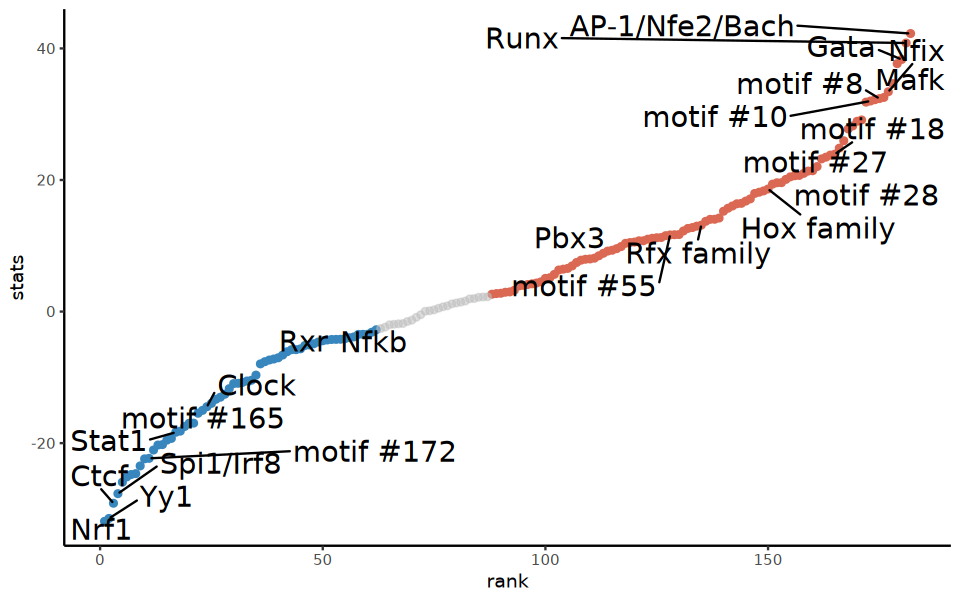

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5) 
plot_data$rank <- dim(plot_data)[1]:1
p <- ggplot(data = plot_data) +
    geom_point(
        data = plot_data[(plot_data$FDR < 0.01) & (plot_data$stats > 0), ],
        aes(x = rank, y = stats), color = "#da6853", fill = "#da6853") +
    geom_point(
        data = plot_data[(plot_data$FDR < 0.01) & (plot_data$stats < 0), ],
        aes(x = rank, y = stats), color= "#3786bd", fill = "#3786bd") +
    geom_point(
        data = plot_data[(plot_data$FDR > 0.01), ],
        aes(x = rank, y = stats), color = "grey", alpha = 0.5) +
    ggrepel::geom_text_repel(
        data = plot_data[label_TF_inds, ],
        aes(x = rank, y = stats, label = unname(label_TFs)), 
        size = 6, max.overlaps = 100) +
    theme_classic()
pdf("../../data//mHSCAging10xMultiome/plots/diff_chromVAR_score_de_novo_motifs.pdf",
   width = 9, height = 5)
p
dev.off()
p

#### (2) Also visualize the chromVAR score correlation between de novo motifs and their best match cisBP motifs

In [6]:
# For each de novo motif, load the chromVAR score correlation with its best match in the known cisBP motif set
corr_path <- "/home/yanhu/data/PRINT/multiScaleFootprinting/data/mHSCAging10xMultiome/de_novo_motifs/chromvar_stats_denovo_corr_cisbp.tsv"
corrs <- read.table(corr_path, sep = "\t", header = T)
corrs$names <- stringr::str_replace_all(corrs$names, " ", "")
results$max_corr <- corrs[match(results$cluster, corrs$cluster),]$max_correlation

png 
  2

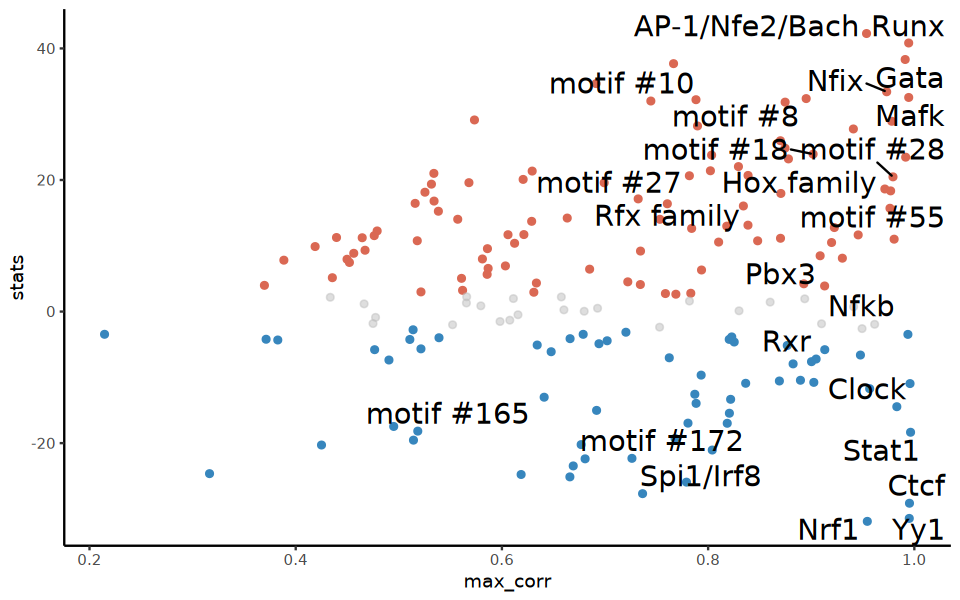

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5) 
plot_data <- results
p <- ggplot(data = plot_data) +
    geom_point(
        data = plot_data[(plot_data$FDR < 0.01) & (plot_data$stats > 0), ],
        aes(x = max_corr, y = stats), color = "#da6853", fill = "#da6853") +
    geom_point(
        data = plot_data[(plot_data$FDR < 0.01) & (plot_data$stats < 0), ],
        aes(x = max_corr, y = stats), color= "#3786bd", fill = "#3786bd") +
    geom_point(
        data = plot_data[(plot_data$FDR > 0.01), ],
        aes(x = max_corr, y = stats), color = "grey", alpha = 0.5) +
    ggrepel::geom_text_repel(
        data = plot_data[label_TF_inds, ],
        aes(x = max_corr, y = stats, label = unname(label_TFs)), 
        size = 6, max.overlaps = 100) +
    theme_classic()
pdf("../../data//mHSCAging10xMultiome/plots/diff_chromVAR_score_vs_max_cisBP_corr_de_novo_motifs.pdf",
   width = 9, height = 5)
p
dev.off()
p

#### (3) Use cisBP motifs 

In [8]:
# Load differential testing results using cisBP chromVAR scores
result_path <- "/home/yanhu/data/PRINT/multiScaleFootprinting/data/mHSCAging10xMultiome/mHSC_aging_10x_cisBP_chromVAR_diff_test.tsv"
results <- read.table(result_path, sep = "\t", header = T)
results <- results[order(-results$stats), ]

# Calculate FDR
results$logPval <- results$pval # Rename this column because the values are in fact log10 pvals
results$pval <- 10^(-results$pval)
results$FDR <- p.adjust(results$pval, method = "fdr")
plot_data <- results

In [9]:
plot_data$TF <- sapply(plot_data$cluster, function(x){stringr::str_split(x, "_")[[1]][3]})

In [10]:
plot_data$TF[1:10]

[1] "Fos"   "Fosl2" "Fosb"  "Jund"  "Tal1"  "Runx3" "Runx1" "Bach2" "Gata4"
[10] "Gata6"

In [11]:
label_TFs <- c(
    "Fos", "Jun", "Nfe2", "Runx2", "Gata2", "Nfix", "Mafk", "Atf4",
    "Yy1", "Ctcf", "Nrf1", "Tfec", "Clock", "Usf1", "Spi1", "Stat1",
    "Rxra", "Nfkb1", "Rel", "Nfya", "Pbx3", "Rfx1", "Xbp1", "Ets1"
)
label_TF_inds <- match(label_TFs, plot_data$TF)

png 
  2

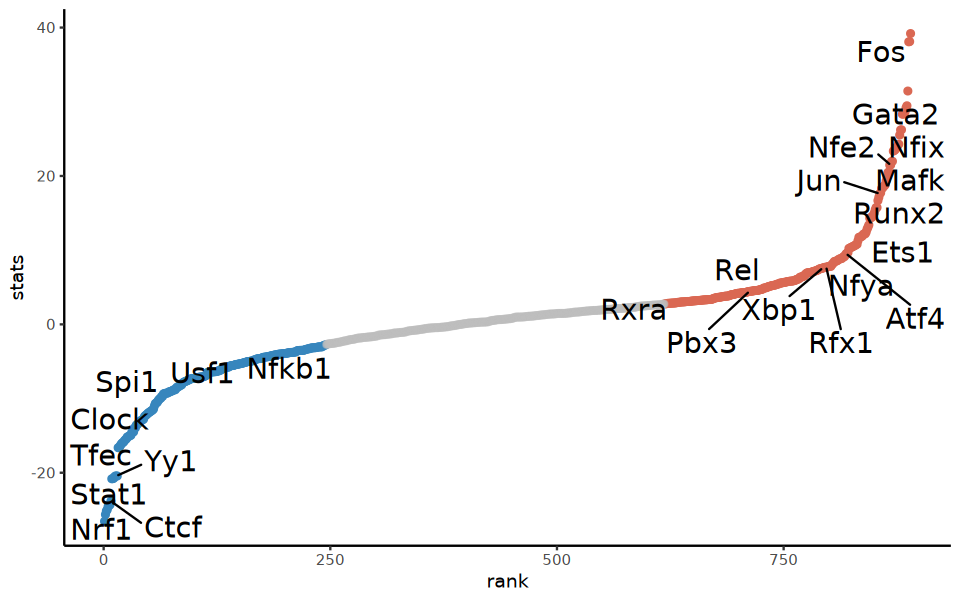

In [12]:
options(repr.plot.width = 8, repr.plot.height = 5) 
plot_data$rank <- dim(plot_data)[1]:1
p <- ggplot(data = plot_data) +
    geom_point(
        data = plot_data[(plot_data$FDR < 0.01) & (plot_data$stats > 0), ],
        aes(x = rank, y = stats), color = "#da6853", fill = "#da6853") +
    geom_point(
        data = plot_data[(plot_data$FDR < 0.01) & (plot_data$stats < 0), ],
        aes(x = rank, y = stats), color= "#3786bd", fill = "#3786bd") +
    geom_point(
        data = plot_data[(plot_data$FDR > 0.01), ],
        aes(x = rank, y = stats), color = "grey", alpha = 0.5) +
    ggrepel::geom_text_repel(
        data = plot_data[label_TF_inds, ],
        aes(x = rank, y = stats, label = label_TFs), 
        size = 6, max.overlaps = 100) +
    xlim(0,900) +
    theme_classic()
pdf("../../data//mHSCAging10xMultiome/plots/diff_chromVAR_score_cisBP_motifs.pdf",
   width = 9, height = 5)
p
dev.off()
p

### Now separately analyze the Mk-biased and multi-lineage subpopulations

In [8]:
mode <- "denovo"

# Load single cell motif scores
data_dir <- "/home/yanhu/data/PRINT/multiScaleFootprinting/data/mHSCAging10xMultiome/"
motif_score_path <- paste0(data_dir, "de_novo_motifs/subpopultiaon/chromvar_", mode, ".txt.gz")
motif_scores <- read.table(motif_score_path, sep="\t", header=1, row.names=1)

if(mode == "cisbp"){
    colnames(motif_scores) <- stringr::str_split_fixed(colnames(motif_scores), "_", 4)[, 3]
}
if(mode == "denovo"){
    rename_table_path <- paste0(data_dir, "de_novo_motifs/denovo_res2_all.txt")
    rename_table <- read.table(rename_table_path, sep = "\t", header = T)
    colnames(motif_scores) <- rename_table$new_name[match(colnames(motif_scores), rename_table$name)]
}

In [9]:
# Load pseudo-bulk barcode grouping
barcode_grouping <- read.table(paste0(data_dir, "barcodeGrouping.txt"), sep="\t", header=1)
group_IDs <- gtools::mixedsort(unique(barcode_grouping$group))

# Assign each pseudo-bulk to a subpopulation
pbulk_clusters <- read.table(paste0(data_dir, "pbulkClusters.txt"), sep="\t")$V1
subpop_mapping <- c(
  "Old_1" = "Old Mk-biased", 
  "Old_2" = "Old intermediate",
  "Old_3" = "Old Mk-biased",
  "Old_4" = "Old multi-lineage",
  "Young_1" = "Young multi-lineage",
  "Young_2" = "Young multi-lineage",
  "Young_3" = "Young Mk-biased"   
)
pbulk_subpop <- unname(subpop_mapping[pbulk_clusters])

In [13]:
subpop <- "multi-lineage"

# Find pseudobulks (cell groups) for the current subpopulation
young_groups <- group_IDs[pbulk_subpop == paste("Young", subpop)]
old_groups <- group_IDs[pbulk_subpop == paste("Old", subpop)]

# Find cell barcodes in the above pseudo bulks
young_barcodes <- unique(barcode_grouping$barcode[barcode_grouping$group %in% young_groups])
old_barcodes <- unique(barcode_grouping$barcode[barcode_grouping$group %in% old_groups])

# Retrieve motif scores for young and old cells selected
young_scores <- t(motif_scores[young_barcodes,])
old_scores <- t(motif_scores[old_barcodes,])

# Perform two sample t-test
test_results <- twoSampTTest(old_scores, young_scores, return_stats=T)
results <- data.frame(
    stats = test_results$stats,
    pval = test_results$pvals,
    TFs = colnames(motif_scores)
)
results <- results[order(-results$stats), ]

# Calculate FDR
results$FDR <- p.adjust(results$pval, method = "fdr")

In [14]:
# Save results
write.table(
    results,
    paste0("../../data/mHSCAging10xMultiome/mHSC_aging_10x_", mode, "_", subpop,
           "_chromVAR_diff_test.tsv"), 
    sep = "\t", quote = F, row.names = F, col.names = T
)

png 
  2

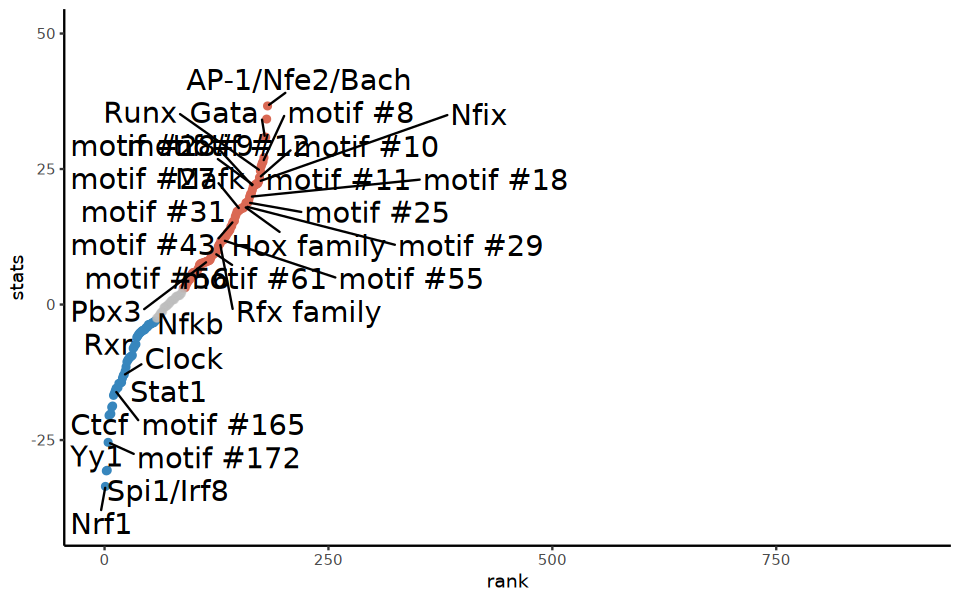

In [15]:
# Label representative TFs
plot_data <- results
if(mode == "cisbp"){
    label_TFs <- c(
        "Fos", "Jun", "Nfe2", "Runx2", "Gata2", "Nfix", "Mafk", "Atf4",
        "Yy1", "Ctcf", "Nrf1", "Tfec", "Clock", "Usf1", "Spi1", "Stat1",
        "Rxra", "Nfkb1", "Rel", "Nfya", "Pbx3", "Rfx1", "Xbp1", "Ets1"
    )
    label_TF_inds <- match(label_TFs, plot_data$TF)
}else if (mode == "denovo"){
    label_TF_inds <- match(names(de_novo_label_TFs), plot_data$TF)
    label_TFs <- de_novo_label_TFs_renamed
}

options(repr.plot.width = 8, repr.plot.height = 5) 
plot_data$rank <- dim(plot_data)[1]:1
p <- ggplot(data = plot_data) +
    geom_point(
        data = plot_data[(plot_data$FDR < 0.01) & (plot_data$stats > 0), ],
        aes(x = rank, y = stats), color = "#da6853", fill = "#da6853") +
    geom_point(
        data = plot_data[(plot_data$FDR < 0.01) & (plot_data$stats < 0), ],
        aes(x = rank, y = stats), color= "#3786bd", fill = "#3786bd") +
    geom_point(
        data = plot_data[(plot_data$FDR > 0.01), ],
        aes(x = rank, y = stats), color = "grey", alpha = 0.5) +
    ggrepel::geom_text_repel(
        data = plot_data[label_TF_inds, ],
        aes(x = rank, y = stats, label = label_TFs), 
        size = 6, max.overlaps = 100) +
    xlim(0,900) + ylim(-40, 50) +
    theme_classic()
pdf(paste0(data_dir, "/plots/diff_chromVAR_score_", mode, "_motifs_", subpop, ".pdf"),
   width = 9, height = 5)
p
dev.off()
p

### Compare results between subpopulations

In [29]:
mode <- "denovo"
subpops <- c("Mk-biased", "multi-lineage")
result_list <- lapply(
    subpops,
    function(subpop){
        result <- read.table(
            paste0("/home/yanhu/data/PRINT/multiScaleFootprinting/data/mHSCAging10xMultiome/",
                  "mHSC_aging_10x_", mode, "_", subpop, "_chromVAR_diff_test.tsv"),
            sep="\t", header=T
        )
        rownames(result) <- result$TFs
        result
    }
)
names(result_list) <- subpops

# Make sure the TFs are in the same order
TFs <- sort(rownames(result_list[["Mk-biased"]]))
for(subpop in subpops){
    result_list[[subpop]] <- result_list[[subpop]][TFs,]
}

png 
  2

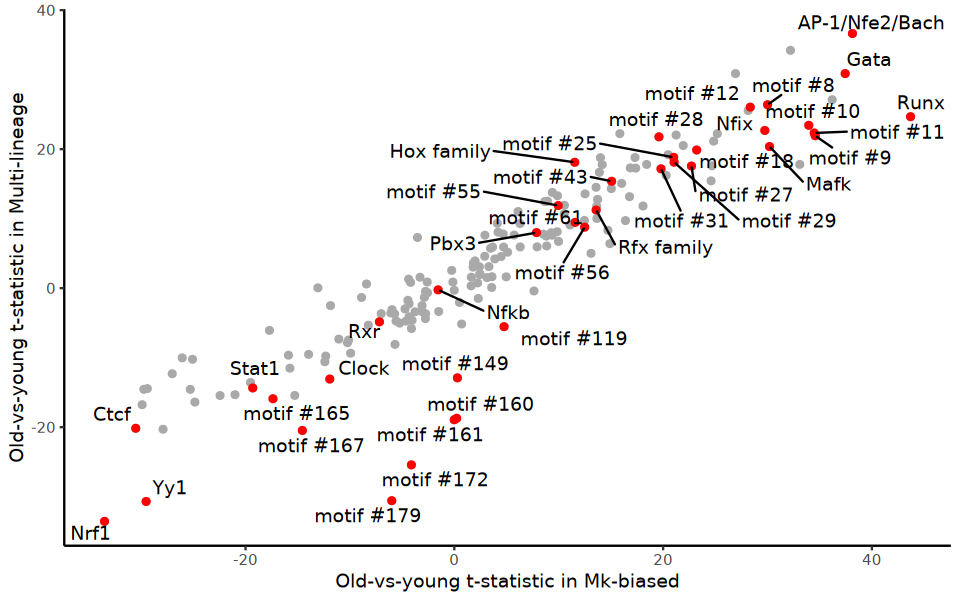

In [41]:
plot_data <- data.frame(
    Mkbias_stats = result_list$`Mk-biased`$stats,
    multilineage_stats = result_list$`multi-lineage`$stats,
    TF = result_list$`Mk-biased`$TFs
)

# Calculate residuals of linear fit
linear_fit <- lm(plot_data$multilineage_stats ~ plot_data$Mkbias_stats)
res <- residuals(linear_fit)

# Label representative TFs
labels <- rep("", dim(plot_data)[1])
if(mode == "cisbp"){
    label_TFs <- c("Ets1", "Gata2", "Runx1", "Fos", "Nfe2", "Nrf1",
                   "Yy1", "Ctcf", "Nfix", "Xbp1", "Nfya", "Tfec", "Stat1")
    labels[match(label_TFs, plot_data$TF)] <- label_TFs
}else if(mode == "denovo"){
    label_TFs <- names(de_novo_label_TFs)
    labels[match(label_TFs, plot_data$TF)] <- de_novo_label_TFs_renamed
}

# Label TFs with distinct behaviour across subpopulations
outlier_TFs <- plot_data[abs(res) > 10,]$TF
outlier_TFs <- paste0("motif #", match(outlier_TFs, results$new_name))
labels[abs(res) > 10] <- outlier_TFs

p <- ggplot(plot_data) +
    geom_point(aes(x=Mkbias_stats, y=multilineage_stats), color="dark grey") +
    geom_point(data=plot_data[labels != "",],
               aes(x=Mkbias_stats, y=multilineage_stats), color="red") +
    xlab("Old-vs-young t-statistic in Mk-biased") +
    ylab("Old-vs-young t-statistic in Multi-lineage") +
    ggrepel::geom_text_repel(
        x=plot_data$Mkbias_stats, 
        y=plot_data$multilineage_stats, 
        label = labels, max.overlaps=100) +
    theme_classic()
p
pdf(paste0(
    "/home/yanhu/data/PRINT/multiScaleFootprinting/data/mHSCAging10xMultiome/plots/",
    "diff_chromVAR_score_", mode, "_subpop_comparison.pdf"))
p
dev.off()